# LAB 1 DATA ANALYSYS

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap, histplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

# буде в подальшому використовуватись
random_state = 43
test_size = 0.3

## Decision Tree

Обрав оцей датасет для класифікації через мульти лейер персептрон
[waterQuality1.csv](https://www.kaggle.com/datasets/mssmartypants/water-quality/)

In [2]:
data = pd.read_csv('../waterQuality1.csv')
print(data.head())
print(data.shape)

   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_saf

Обробка датасету по видаленню викидів ітд:

In [3]:
y_name = 'is_safe'
data[y_name] = pd.to_numeric(data[y_name], errors='coerce')
data = data.dropna(subset=[y_name])
x_data = data.drop(y_name, axis=1)
x_name = x_data.columns
for i in x_name:
    data[i] = pd.to_numeric(data[i], errors='coerce')
    mean_value = data[i].mean()
    std_dev = data[i].std()
    lower_bound = mean_value - 4 * std_dev
    upper_bound = mean_value + 4 * std_dev
    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]
x_data = data.drop(y_name, axis=1)
scaler = StandardScaler()
# scaler = MinMaxScaler()

data_scaled_arr = scaler.fit_transform(x_data)
data_scaled = data.copy()
data_scaled[x_name] = data_scaled_arr
data_scaled[y_name] = data_scaled[y_name].astype(int)

Матриця корелляції змінних датасету

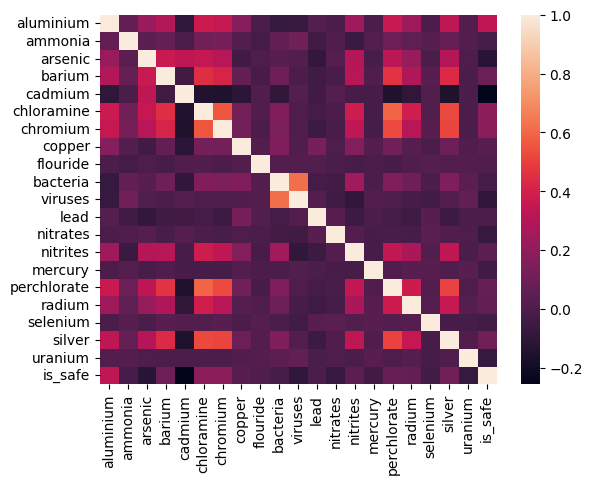

In [4]:
heatmap(data_scaled.corr(numeric_only=True), annot=False)
plt.show()

In [5]:
print(x_data.corrwith(data[y_name], numeric_only=True).sort_values(ascending = False, key = np.abs))

aluminium      0.333974
cadmium       -0.256034
chloramine     0.186704
chromium       0.182306
arsenic       -0.123362
silver         0.102813
viruses       -0.097040
barium         0.090858
perchlorate    0.075735
uranium       -0.075619
nitrates      -0.072100
radium         0.064743
nitrites       0.046986
mercury       -0.036817
selenium      -0.030923
copper         0.029498
ammonia       -0.022919
bacteria      -0.022077
lead          -0.009970
flouride       0.006550
dtype: float64


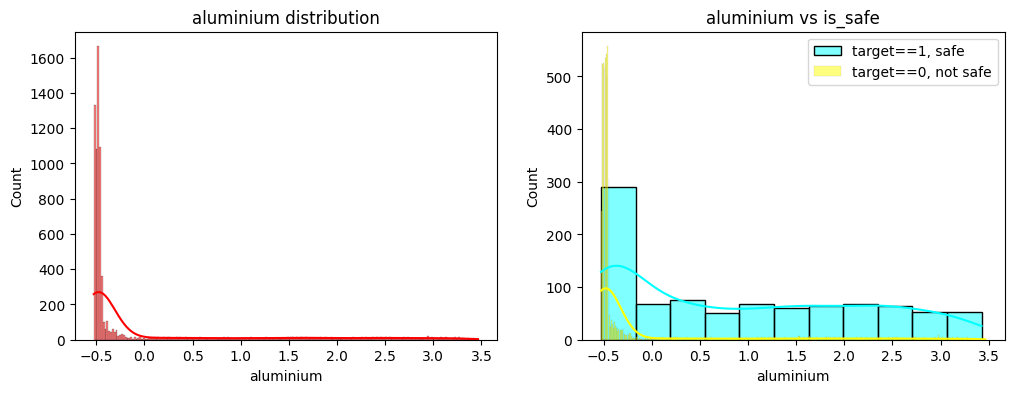

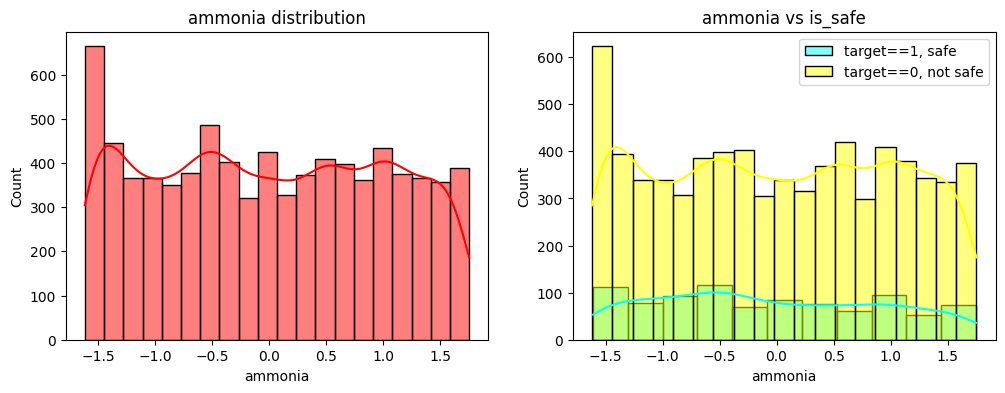

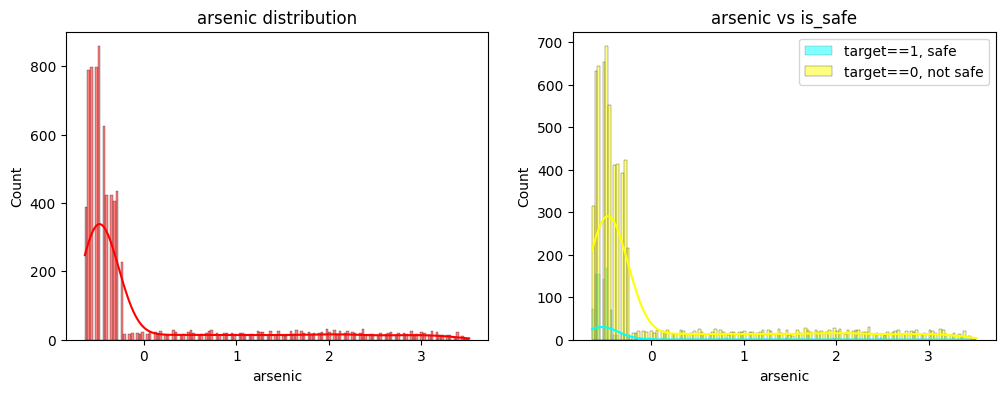

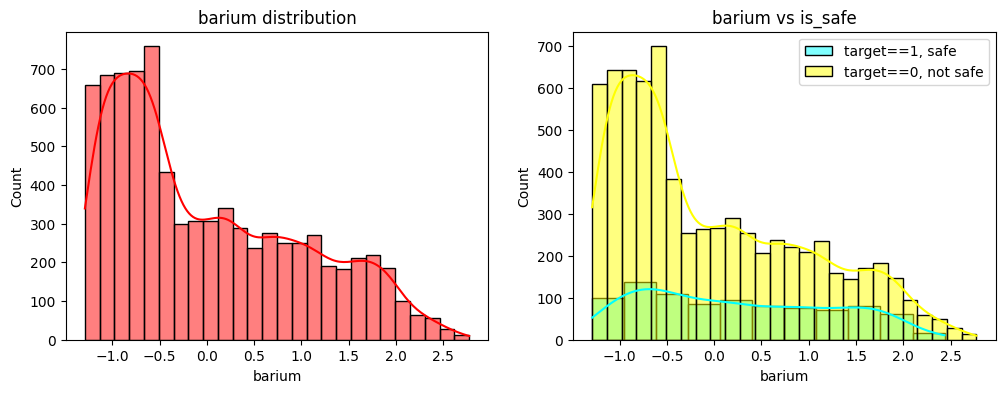

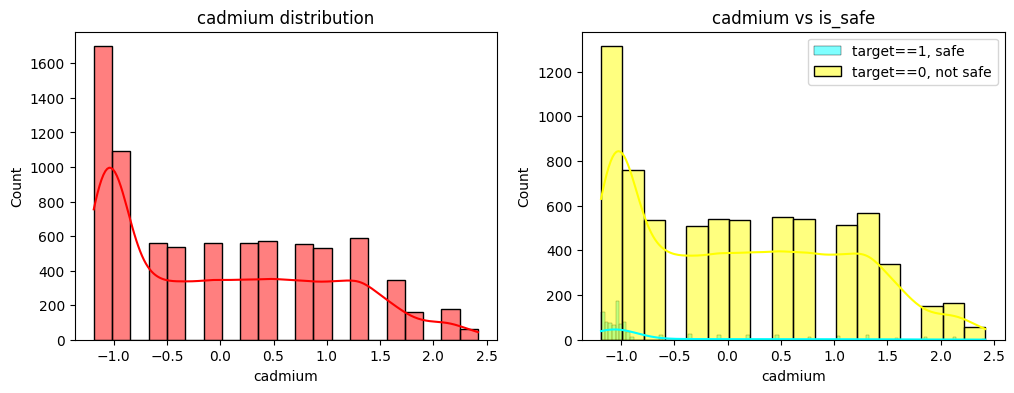

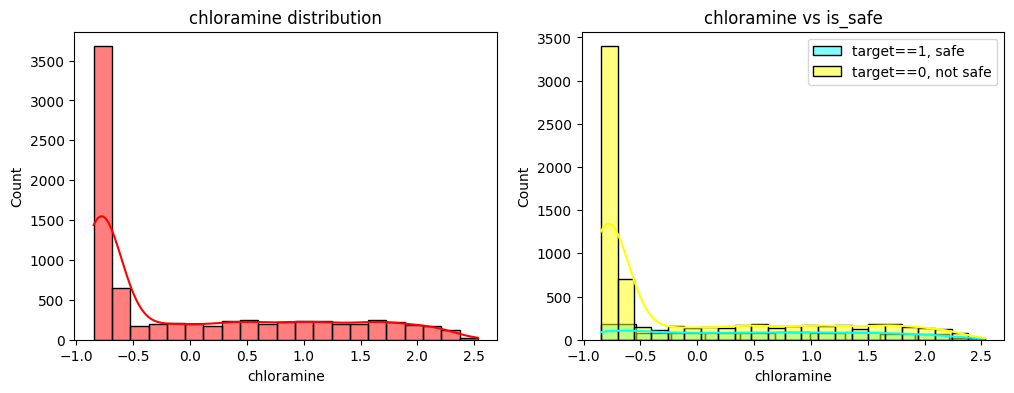

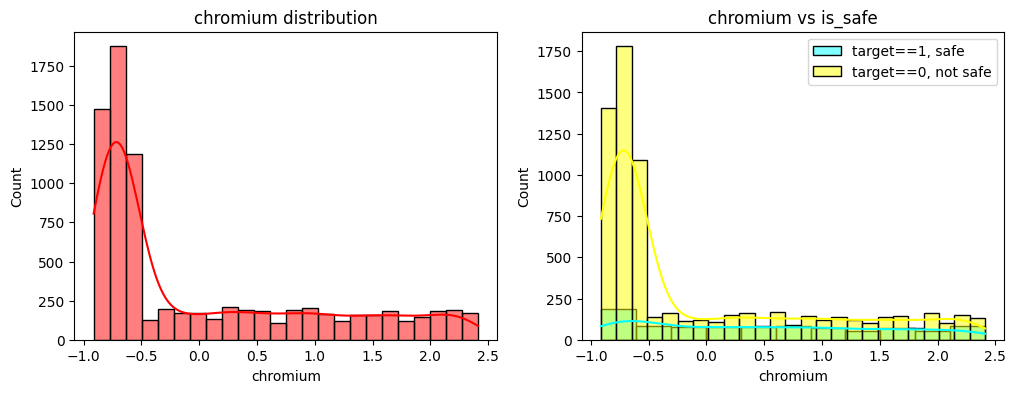

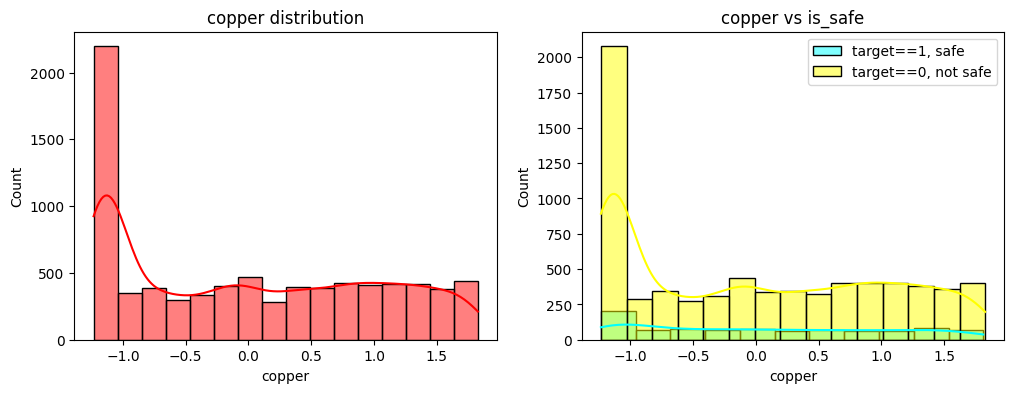

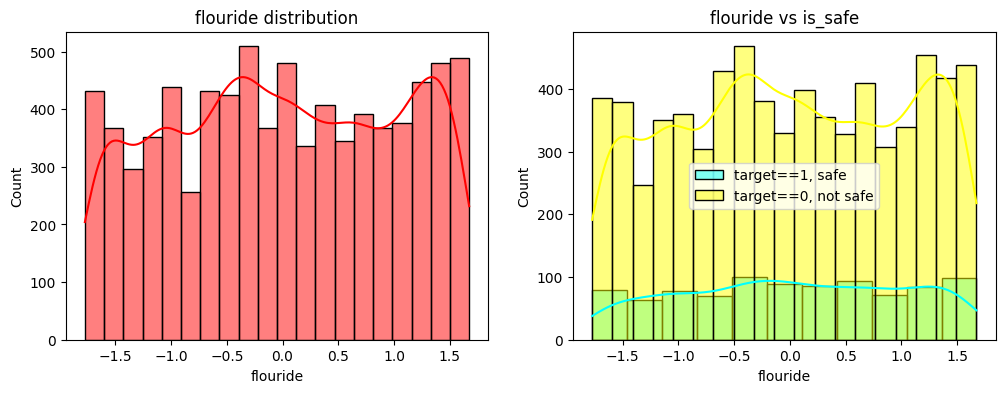

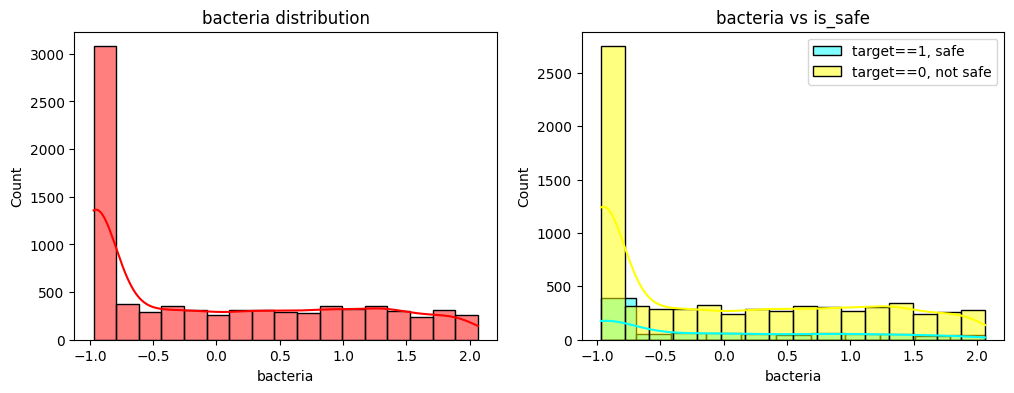

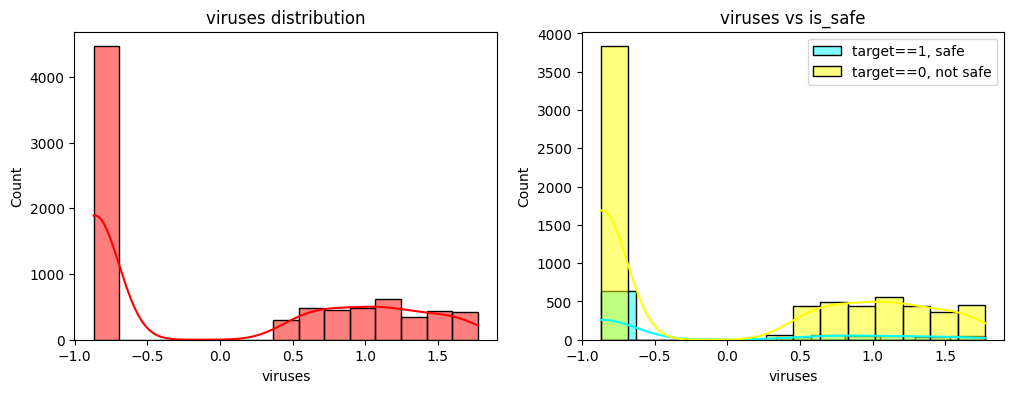

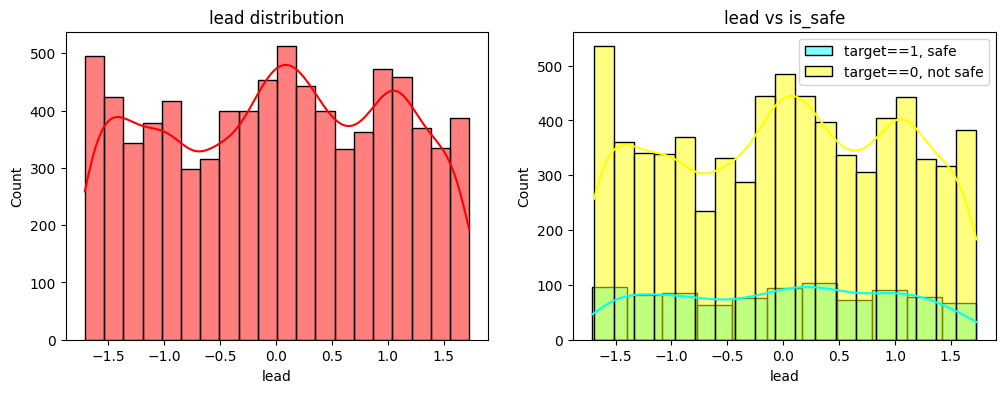

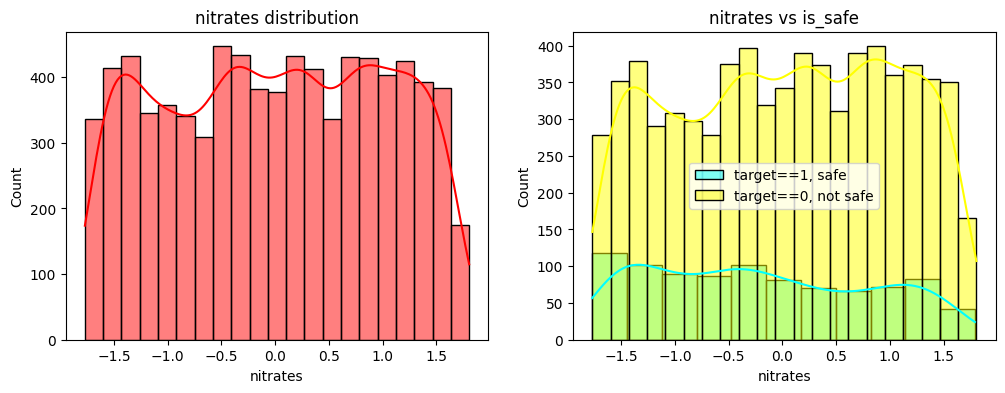

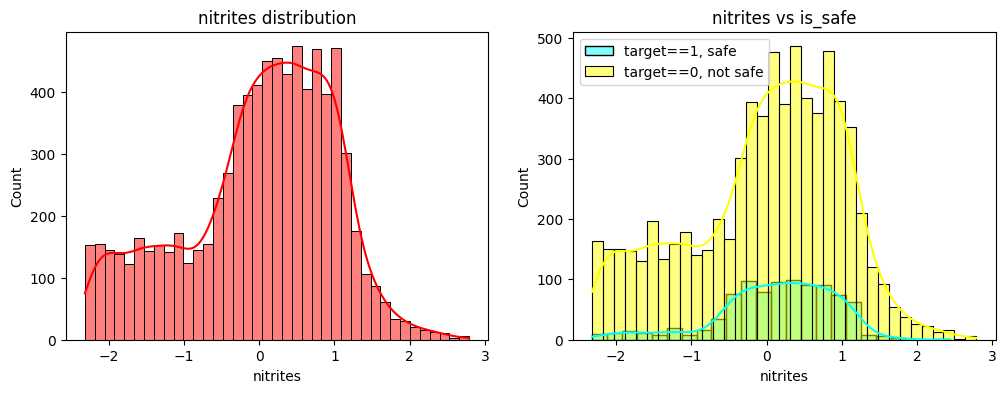

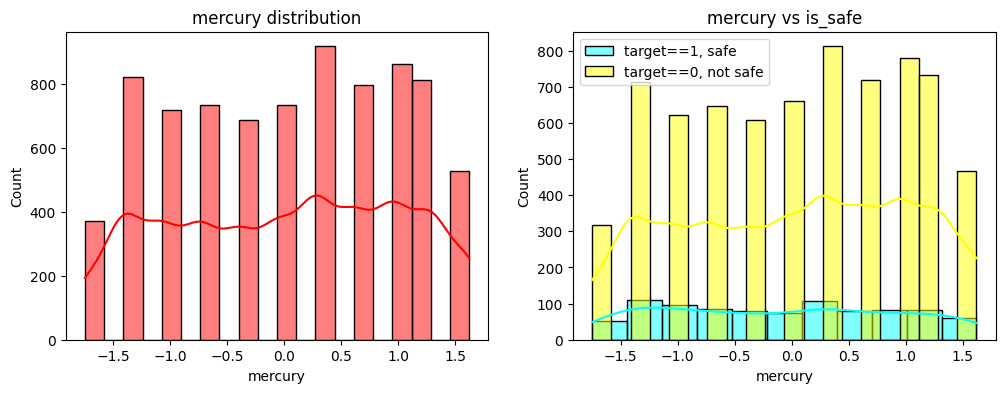

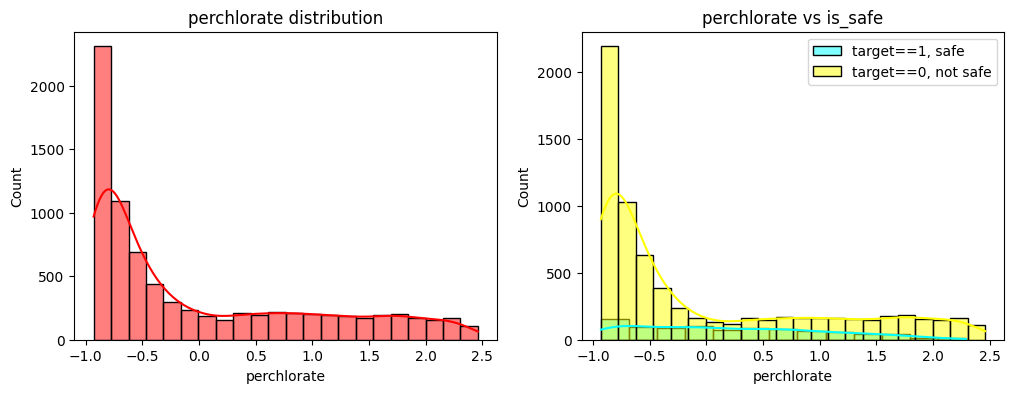

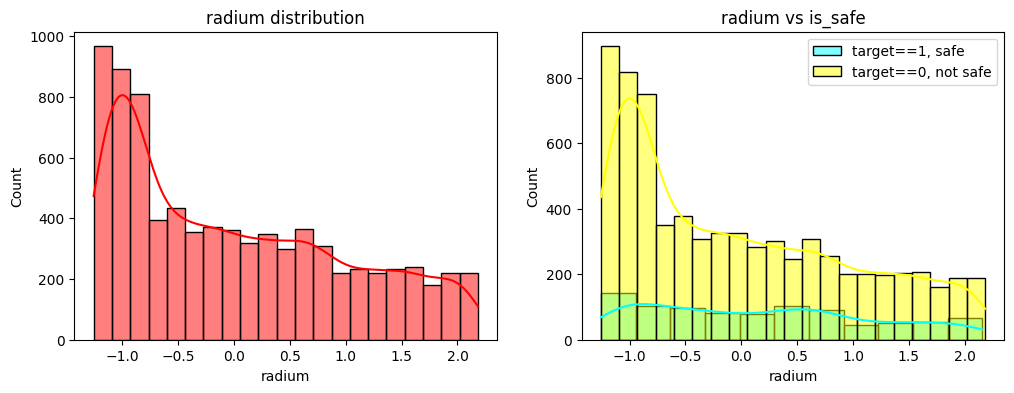

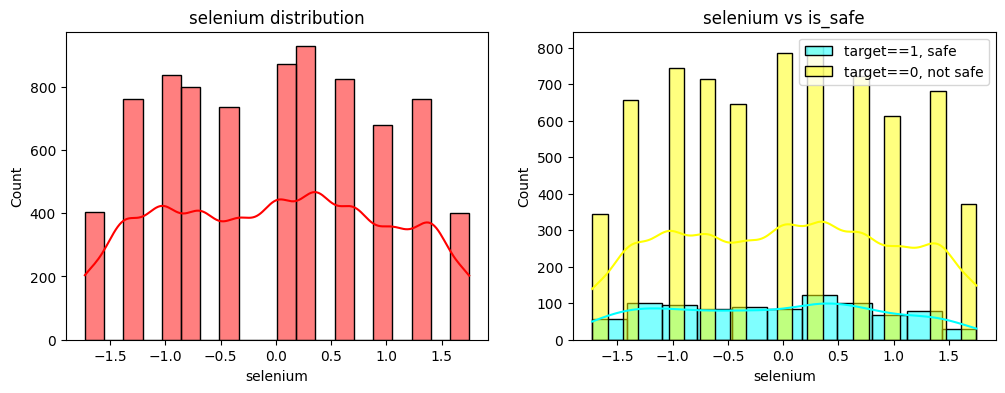

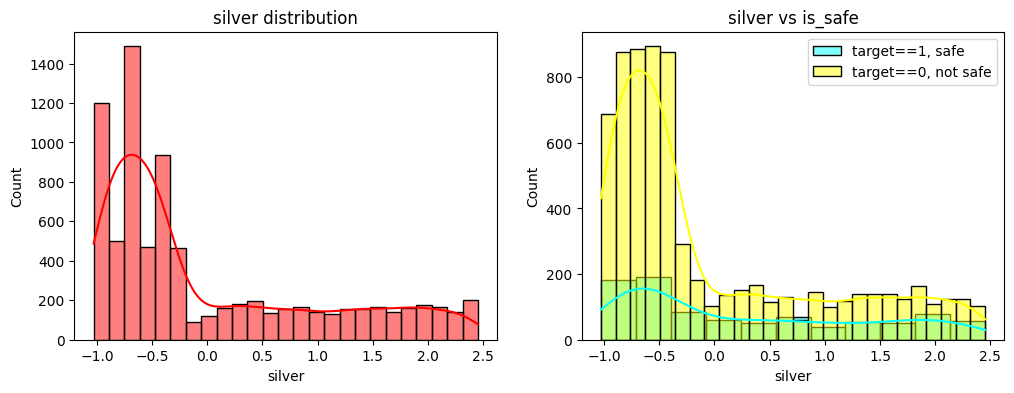

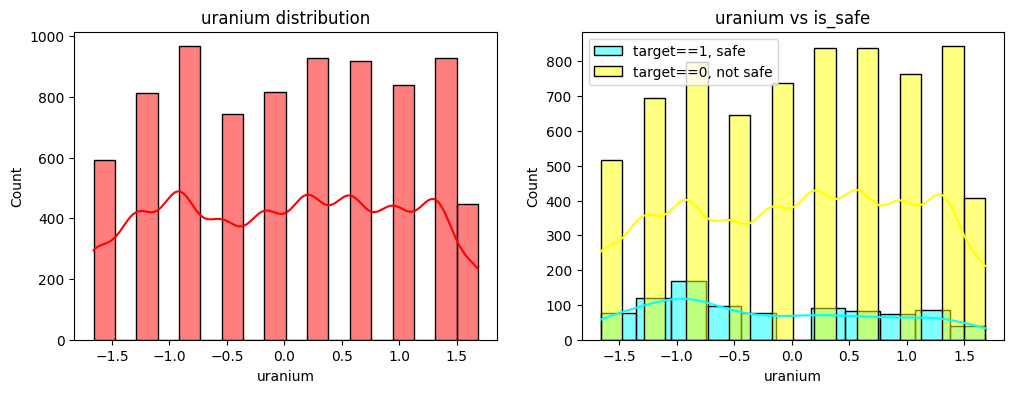

In [6]:
for col in x_name:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Use 1 row, 2 columns for side-by-side plots
    # fig.suptitle(f"{col} distribution and {col} vs {y_name}")

    axs[0].set_title(f"{col} distribution")
    histplot(data_scaled[col], color='red', ax=axs[0], kde=True)

    axs[1].set_title(f'{col} vs {y_name}')
    histplot(data_scaled[col][data_scaled[y_name] == 1.0], color='cyan', alpha=0.5, label='target==1, safe', ax=axs[1], kde=True)
    histplot(data_scaled[col][data_scaled[y_name] == 0.0], color='yellow', alpha=0.5, label='target==0, not safe', ax=axs[1], kde=True)
    axs[1].legend()

    plt.show()

Розбивання даних на тестову та навчальну вибірку

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(data_scaled[x_name], data_scaled[y_name], test_size=test_size, random_state=random_state, stratify=data_scaled[y_name])

### Scikit Learn - Decision Tree

Accuracy: 0.9525
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2125
           1       0.78      0.81      0.80       274

    accuracy                           0.95      2399
   macro avg       0.88      0.89      0.88      2399
weighted avg       0.95      0.95      0.95      2399

Confusion Matrix:
[[2063   62]
 [  52  222]]


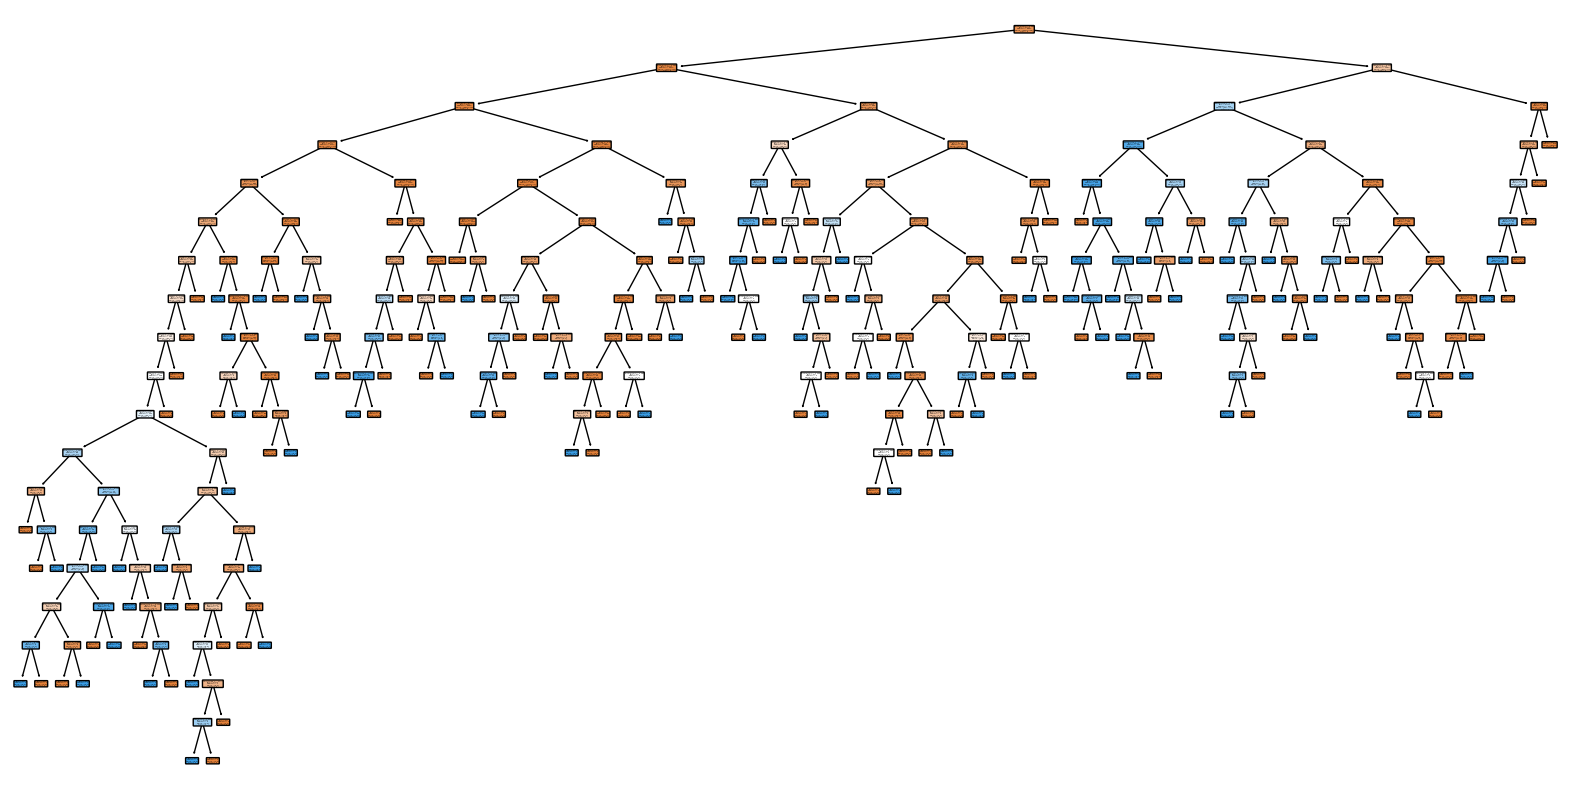

In [8]:
# DecisionTreeClassifier
clf = DecisionTreeClassifier(
    criterion="gini",  # "entropy"
    splitter="best",  # "best"
    max_depth=100, 
    random_state=20)

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)
plt.savefig('decision_tree.png', format='png', dpi=300) # зображення картинки графу

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

### Decision Tree Realisation

In [9]:
class TreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None, proba=None):
        self.feature_index = feature_index  # індекс ознаки, за якою розбивається вузол
        self.threshold = threshold  # поріг, за яким розбивається вузол
        self.left = left  # лівий нащадок вузла
        self.right = right  # правий нащадок вузла
        self.value = value  # значення вузла (клас) у листовому вузлі
        self.proba = proba  # імовірність для листка

листочки що будуть ключовими в класі дерева

In [10]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth  # максимальна глибина дерева
        self.root = None  # корінь дерева

    def fit(self, X, Y):
        self.root = self._build_tree(X, Y)  # побудова дерева на основі навчальних даних

    def _build_tree(self, X, Y, depth=0):
        # перевірка умови зупинки для рекурсивного побудови дерева
        if depth == self.max_depth or len(np.unique(Y)) == 1:
            proba = np.bincount(Y) / len(Y)
            if np.array_equal(proba, np.array([1.])):
                proba = np.concatenate([proba, [0.]])
            return TreeNode(value=np.argmax(proba), proba=proba)  # листовий вузол з прогнозом класу

        best_feature, best_threshold = self._best_split(X, Y)  # знаходження кращого розбиття
        if best_feature is None:
            class_probs = np.bincount(Y) / len(Y)
            return TreeNode(value=np.argmax(class_probs), proba=class_probs)

        # розділення даних на піддерева та рекурсивна побудова дерева для кожного піддерева
        left_indices = np.where(X[:, best_feature] <= best_threshold)[0]
        right_indices = np.where(X[:, best_feature] > best_threshold)[0]
        left_child = self._build_tree(X[left_indices], Y[left_indices], depth + 1)
        right_child = self._build_tree(X[right_indices], Y[right_indices], depth + 1)

        return TreeNode(feature_index=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def _gini_impurity(self, y): # обчислення критерію для гілок
        total_samples = len(y)
        class_counts = np.bincount(y)
        class_probs = class_counts / total_samples
        gini = 1.0 - np.sum(class_probs ** 2)  # обчислення критерію gini
        return gini

    def _best_split(self, X, Y): # спліт дерева обраховуємо по всім можливим значенням
        best_gini = float('inf')
        best_feature = 0
        best_threshold = 0

        # перебір усіх можливих розбиттів і вибір найкращого за критерієм gini (найменшого)
        for feature_index in range(X.shape[1]):
            unique_values = np.unique(X[:, feature_index])
            for threshold in unique_values:
                left_indices = np.where(X[:, feature_index] <= threshold)[0]
                right_indices = np.where(X[:, feature_index] > threshold)[0]

                left_gini = self._gini_impurity(Y[left_indices])
                right_gini = self._gini_impurity(Y[right_indices])

                gini = (len(left_indices) * left_gini + len(right_indices) * right_gini) / len(Y) # формула обрахунку gini impurity
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def predict(self, X):
        return np.array([self._predict(sample) for sample in X])  # прогноз для кожного зразка вхідних даних

    def predict_proba(self, X):
        return np.array([self._predict_proba(sample) for sample in X])
    
    def _predict(self, x, node=None):
        if node is None:
            node = self.root
        if node.value is not None:
            return node.value  # повернення прогнозу для листового вузла
        if x[node.feature_index] <= node.threshold:
            return self._predict(x, node.left)  # рекурсивний виклик для лівого піддерева
        else:
            return self._predict(x, node.right)  # рекурсивний виклик для правого піддерева


    def _predict_proba(self, x, node=None):
        if node is None:
            node = self.root
        if node.value is not None:
            return node.proba  # повернення прогнозу для листового вузла
        if x[node.feature_index] <= node.threshold:
            return self._predict_proba(x, node.left)  # рекурсивний виклик для лівого піддерева
        else:
            return self._predict_proba(x, node.right)  # рекурсивний виклик для правого піддерева


Методи для створення дерева та передбачення значеннь рекурсивним проходженням по дереву в залежності від визначених threshold

In [11]:
# My Tree
tree_classifier = DecisionTree(max_depth=10)
tree_classifier.fit(X_train.values, Y_train.values)
predictions1 = tree_classifier.predict(X_test.values)

accuracy = np.sum(predictions1 == Y_test) / len(Y_test)
print(f"My Tree Accuracy: {accuracy:.4f}")
print("My Tree Classification Report:")
print(classification_report(Y_test, predictions1))
conf_matrix = confusion_matrix(Y_test, predictions1)
print("My Tree Confusion Matrix:")
print(conf_matrix)

My Tree Accuracy: 0.9554
My Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2125
           1       0.78      0.86      0.81       274

    accuracy                           0.96      2399
   macro avg       0.88      0.91      0.89      2399
weighted avg       0.96      0.96      0.96      2399

My Tree Confusion Matrix:
[[2057   68]
 [  39  235]]


In [12]:
# print(tree_classifier.predict_proba(X_test.values))
hhh = tree_classifier.predict_proba(X_test.values)
for i in range(len(X_test)):
    print(hhh[i])

[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0.46323529 0.53676471]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0.46323529 0.53676471]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]


## Random Forest

*За аналогічними даними що використовувались у Decision Tree

### Scikit Learn - Random Forest

In [13]:
# RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=10,
    criterion="gini", #"entropy"
    max_depth=10,
    max_samples=0.8,
    random_state=random_state)

rf_classifier.fit(X_train, Y_train)
Y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:")
print(classification_report(Y_test, Y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_rf))

Random Forest Accuracy: 0.9491
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2125
           1       0.90      0.63      0.74       274

    accuracy                           0.95      2399
   macro avg       0.92      0.81      0.86      2399
weighted avg       0.95      0.95      0.95      2399

Random Forest Confusion Matrix:
[[2105   20]
 [ 102  172]]


In [14]:
Y_pred_proba_rf = rf_classifier.predict_proba(X_test)
print(Y_pred_proba_rf)

[[0.01614987 0.98385013]
 [0.38908605 0.61091395]
 [0.78691162 0.21308838]
 ...
 [0.8        0.2       ]
 [0.99705882 0.00294118]
 [1.         0.        ]]


Тепер маємо "Випадковий Ліс" - наче й точність не піднялася, але кількість TruePositive та FalsePositive значно піднялася - працює краще
* Проблема тіко що забагато FalseNegatives - проблема імовірно датасету

### Random Forest Realisation

Маючи попередньо визначені класи TreeNode та DecisionTree можна реалізувати алгоритм начання багатьох таких дерев об'єднаних в ліс

In [15]:
class RandomForest:
    def __init__(self, n_estimators=10, max_depth=5, subset_size=0.8):
        self.n_estimators = n_estimators  # кількість дерев у випадковому лісі
        self.max_depth = max_depth  # максимальна глибина кожного дерева
        self.subset_size = subset_size  # розмір підвибірки для навчання кожного дерева
        self.trees = []  # список для зберігання дерев у лісі

    def fit(self, X, y):
        num_samples, num_features = X.shape  # кількість зразків і ознак у вибірці
        num_subset_samples = int(self.subset_size * num_samples)  # кількість зразків у підвибірці

        for _ in range(self.n_estimators):
            subset_indices = np.random.choice(num_samples, num_subset_samples, replace=False) # створення дерева рішень і навчання його на підвибірці
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X.iloc[subset_indices].values, y.iloc[subset_indices].values) # необхідні конвертації та навчання усіх дерев
            self.trees.append(tree)  # додавання навченого дерева до списку

    def predict(self, X):
        predictions = np.array([tree.predict(X.values) for tree in self.trees]) # передбачуємо значення для кожного дерева
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions) # повернення результату голосування з дерев

    def predict_proba(self, X):
        predictions = np.array([tree.predict_proba(X.values) for tree in self.trees])
        return np.mean(predictions, axis=0)

Тепер навчаємо цю модель та робимо передбачення

In [16]:
# My Forest
random_forest = RandomForest(n_estimators=10, max_depth=10, subset_size=0.8)
random_forest.fit(X_train, Y_train)
predictions2 = random_forest.predict(X_test)

accuracy = np.sum(predictions2 == Y_test) / len(Y_test)
print(f"My Forest Accuracy: {accuracy:.4f}")
print("My Forest Classification Report:")
print(classification_report(Y_test, predictions2))
conf_matrix = confusion_matrix(Y_test, predictions2)
print("My Forest Confusion Matrix:")
print(conf_matrix)

My Forest Accuracy: 0.9625
My Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2125
           1       0.89      0.77      0.82       274

    accuracy                           0.96      2399
   macro avg       0.93      0.88      0.90      2399
weighted avg       0.96      0.96      0.96      2399

My Forest Confusion Matrix:
[[2098   27]
 [  63  211]]


Висновки:
1) В лісах кількість дерев та сабсет розміри серйозно впливають на модель - потрібно вибирати оптимальні щоб не задовго працювала модель + була відносно точна (десь 10 дерев та 0.8 спліт - більше і менше модель гірша)
2) Реалізовані моделі хоч і частково кращі але дууууууже повільно виконується навчання - структури важкі і обрахунки досить комплексні + датасет досить великий
3) Оптимальною глибиною вийшло значення 10 - закороткі менш точні, а глибокі довго обраховуються і перенавчаються трохи

## SVM

Обрав оцей датасет для класифікації через Support Vector Machine
['gender_classification_v7.csv'](https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset)

   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female  


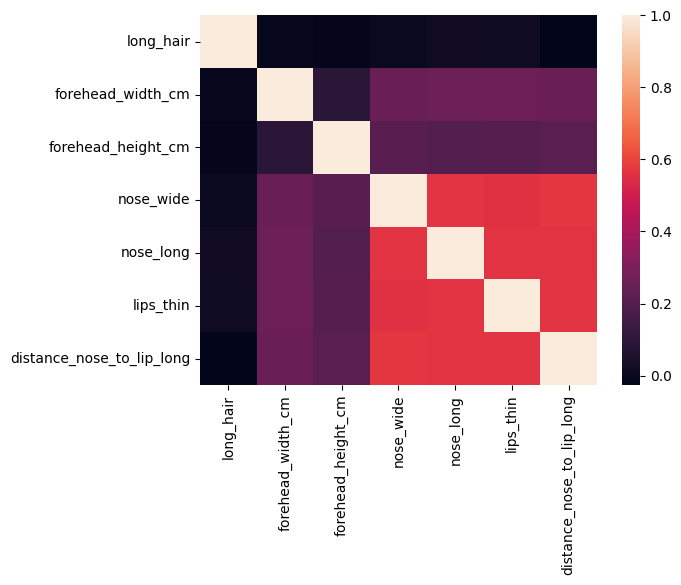

In [17]:
data = pd.read_csv('../gender_classification_v7.csv')
y_name = 'gender'
print(data.head())
heatmap(data.corr(numeric_only=True), annot=False)
plt.show()

Зробимо обробочку даних щоб target був -1, 1 - у SVM такі значення використовуються 

і Видалю стовпчик long_hair бо він нульовий по кореляції

In [18]:
data[y_name] = data[y_name].map({'Male': 1, 'Female': -1})
print(data.head())

cross_tab_result = pd.crosstab(data["long_hair"], data[y_name])
print(cross_tab_result)

data[y_name] = pd.to_numeric(data[y_name], errors='coerce')
data = data.dropna(subset=[y_name])

   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1       1  
1          1                          0      -1  
2          1                          1       1  
3          1                          1       1  
4          0                          0      -1  
gender       -1     1
long_hair            
0           317   335
1          2184  2165


Почищу і заскейлю дані:

In [19]:
# x_data = data.drop('long_hair', axis=1)
x_data = data.drop(y_name, axis=1)
x_name = x_data.columns


for i in x_name:
    data[i] = pd.to_numeric(data[i], errors='coerce')
    mean_value = data[i].mean()
    std_dev = data[i].std()
    lower_bound = mean_value - 3 * std_dev
    upper_bound = mean_value + 3 * std_dev
    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]

x_data = data[x_name]
scaler = MinMaxScaler()
data_scaled_arr = scaler.fit_transform(x_data)
data_scaled = data.copy()
data_scaled[x_name] = data_scaled_arr
data_scaled[y_name] = data_scaled[y_name].astype(int)

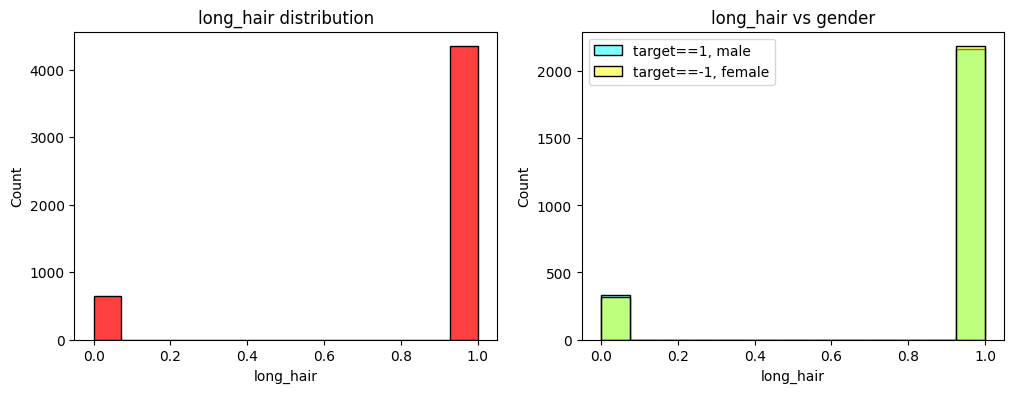

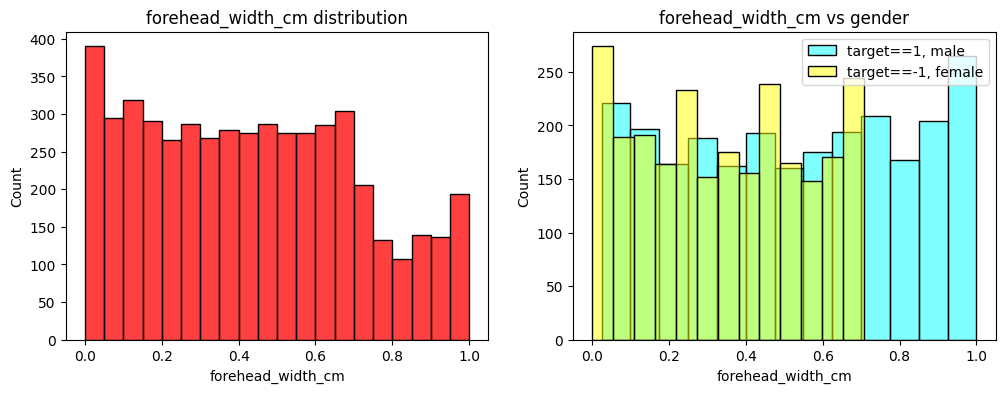

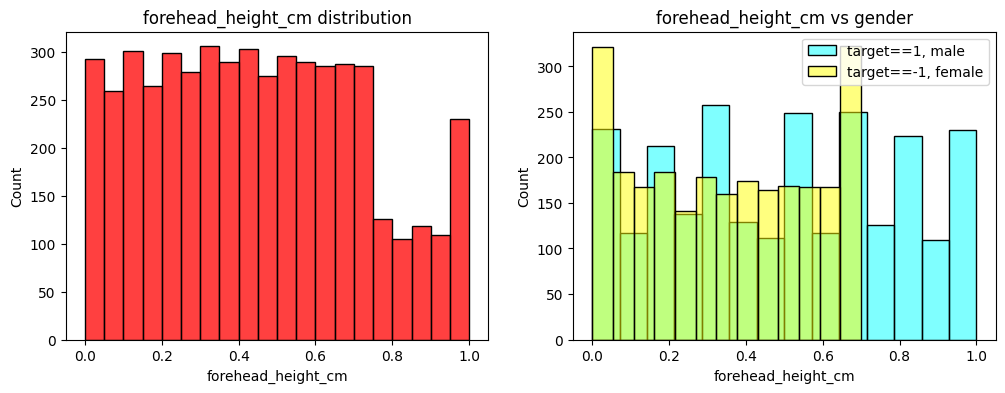

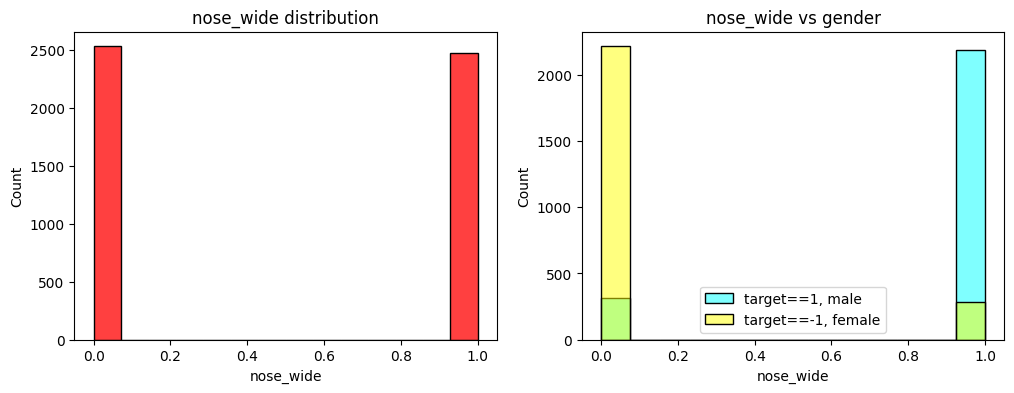

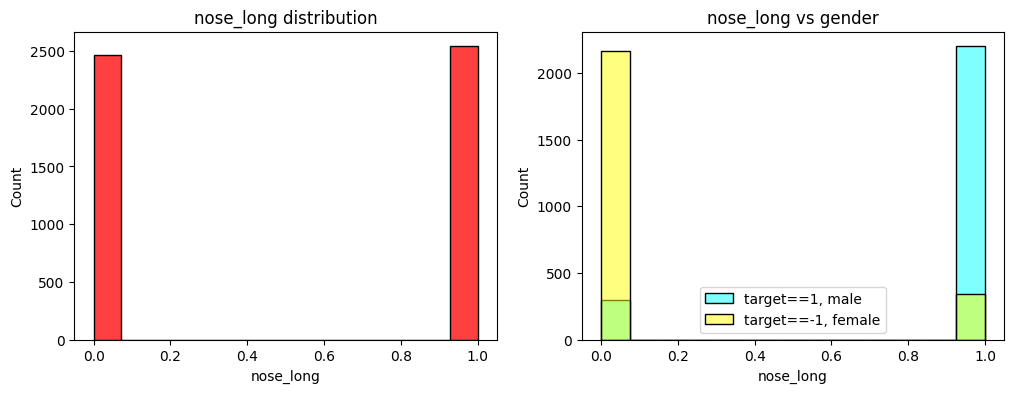

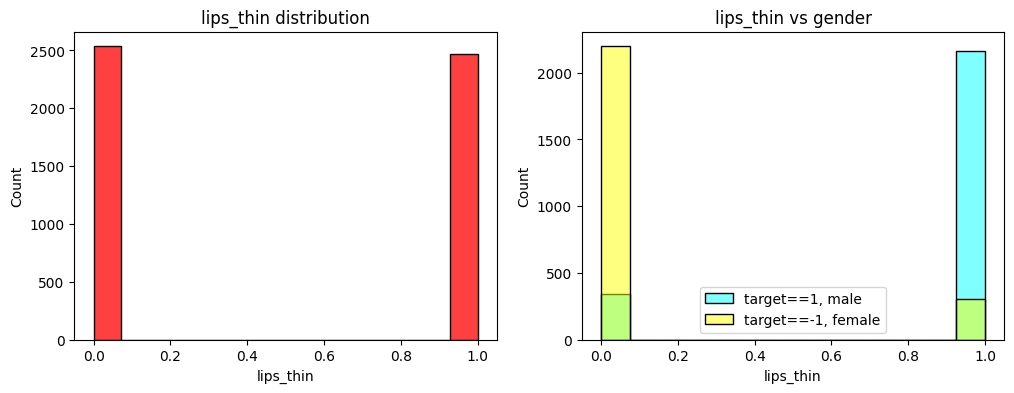

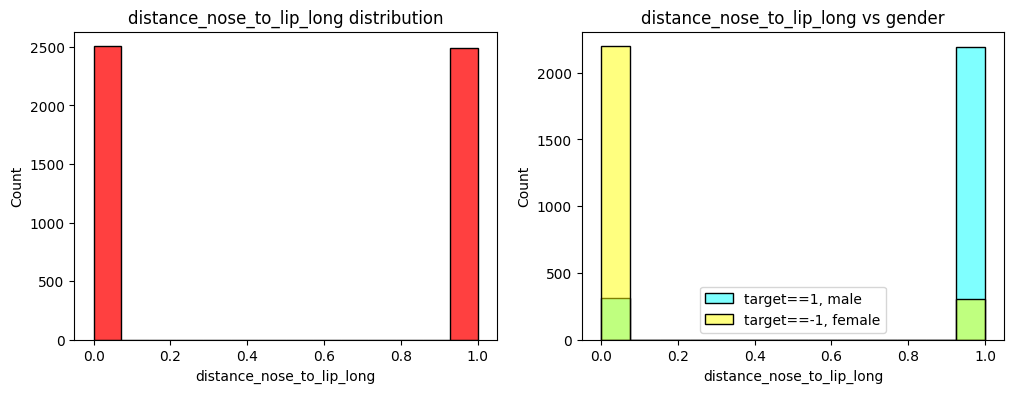

In [20]:
for col in x_name:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Use 1 row, 2 columns for side-by-side plots
    # fig.suptitle(f"{col} distribution and {col} vs {y_name}")

    axs[0].set_title(f"{col} distribution")
    histplot(data_scaled[col], color='red', ax=axs[0])

    axs[1].set_title(f'{col} vs {y_name}')
    histplot(data_scaled[col][data_scaled[y_name] == 1.0], color='cyan', alpha=0.5, label='target==1, male', ax=axs[1])
    histplot(data_scaled[col][data_scaled[y_name] == -1.0], color='yellow', alpha=0.5, label='target==-1, female', ax=axs[1])
    axs[1].legend()

    plt.show()

Є змінні з розподілом нормальним - а є чисто вказівники на 0 або 1 які дають вказівку на клас

   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0        1.0           0.097561                0.50        1.0        0.0   
1        0.0           0.634146                0.15        0.0        0.0   
2        0.0           0.097561                0.60        1.0        1.0   
3        0.0           0.731707                0.50        0.0        1.0   
4        1.0           0.512195                0.40        0.0        0.0   

   lips_thin  distance_nose_to_lip_long  gender  
0        1.0                        1.0       1  
1        1.0                        0.0      -1  
2        1.0                        1.0       1  
3        1.0                        1.0       1  
4        0.0                        0.0      -1  


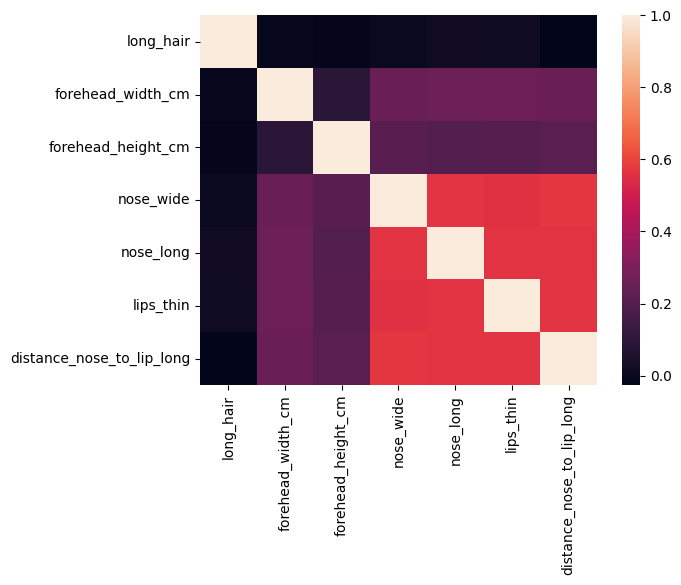

In [21]:
print(data_scaled.head())

heatmap(data_scaled[x_name].corr(numeric_only=True), annot=False)
plt.show()

In [22]:
random_state = 43
X_train, X_test, Y_train, Y_test = train_test_split(data_scaled[x_name].values, data_scaled[y_name].values,test_size=test_size, random_state=random_state, stratify=data_scaled[y_name].values)

### Sklearn SVM

Виконуємо Gridsearch

In [23]:
param_grid = {
    'C': [0.1, 1, 10, 100],        
    'gamma': [1, 0.1, 0.01, 0.001],  
    'kernel': ['rbf', 'linear']                
}

svm_model = SVC(random_state=random_state, verbose=0)

grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=1, cv=5)
grid_search.fit(X_train, Y_train)
print(f"Best parameters found: {grid_search.best_params_}")

# Predict using the best model
Y_pred = grid_search.best_estimator_.predict(X_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [24]:
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.99      0.97       751
           1       0.99      0.96      0.97       750

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

Confusion Matrix:
[[741  10]
 [ 30 720]]


### SVM Realisation

 обрав лінійне ядро тому що як показав sklearn - досить точно передбачує + спроби зробити rbf дуже вповільнюють алгоритм і не набагато кращі

In [25]:
class SVM:
    def __init__(self, learning_rate=0.001, regularization=0.01, n_iters=300, tol=1e-3):
        self.lr = learning_rate  # швидкість навчання
        self.regularization = regularization  # параметр регуляризації - контролює перенавчання
        self.n_iters = n_iters  # кількість ітерацій навчання
        self.w = None  # ваги моделі
        self.b = 0  # зсув
        self.tol = tol  # критерій зупинки
        
    def fit(self, X, Y, x_test, y_test, patience=5):
        # Y = np.where(Y >= 0.5, 1, -1)  # перетворює бінарні мітки на -1 та 1 для SVM

        self.w = np.random.rand(X.shape[1])
        prev_accuracy = 0.0
        no_improvement_count = 0

        for iteration in range(self.n_iters):
            for i, xi in enumerate(X):  # проходим по всім прикладам у навчальному наборі
                condition = Y[i] * (np.dot(xi, self.w) - self.b) >= 1  # обчислює умову для оновлення ваг
                self.update_weights(xi, Y[i], condition)  # оновлює ваги та зсув на основі втрати

            accuracy = self.calculate_accuracy(x_test, y_test)  # обчислює точність на тестовому наборі
            print(f"Iteration {iteration + 1}, Accuracy: {round(accuracy, 4)}")  # виводить точність

            # Перевіряє умову зупинки навчання
            if abs(accuracy - prev_accuracy) < self.tol and abs(accuracy - prev_accuracy) != 0:
                no_improvement_count += 1
                if no_improvement_count >= patience:
                    print(f"Converged. Stopping after {patience} iterations with no improvement.")
                    break
            else:
                no_improvement_count = 0  # Reset the counter if there's an improvement

            prev_accuracy = accuracy  # зберігає поточну точність для наступної ітерації

    def update_weights(self, x_i, y_i, condition):
        # оновлюю ваги моделі на основі градієнтного спуску та умови на оновлення
        if condition:
            self.w -= self.lr * (2 * self.regularization * self.w) # лише регуляризація
        else:
            self.w -= self.lr * (2 * self.regularization * self.w - np.dot(x_i, y_i)) # регуляризація з градієнтом
            self.b -= self.lr * y_i # часткове оновлення для параметра зсуву

    def calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y) # точність передбачень моделі на тестовому наборі
        return accuracy

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b # передбачення класів на основі навченої моделі SVM
        return np.where(approx >= 0, 1, -1)

In [26]:
clf = SVM()
clf.fit(X_train, Y_train, X_test, Y_test, patience=5)
predictions = clf.predict(X_test)

Iteration 1, Accuracy: 0.9647
Iteration 2, Accuracy: 0.9667
Iteration 3, Accuracy: 0.9667
Iteration 4, Accuracy: 0.9654
Iteration 5, Accuracy: 0.9734
Iteration 6, Accuracy: 0.97
Iteration 7, Accuracy: 0.97
Iteration 8, Accuracy: 0.97
Iteration 9, Accuracy: 0.9694
Iteration 10, Accuracy: 0.97
Iteration 11, Accuracy: 0.972
Iteration 12, Accuracy: 0.9707
Iteration 13, Accuracy: 0.972
Iteration 14, Accuracy: 0.972
Iteration 15, Accuracy: 0.9707
Iteration 16, Accuracy: 0.9707
Iteration 17, Accuracy: 0.97
Iteration 18, Accuracy: 0.9707
Iteration 19, Accuracy: 0.9714
Iteration 20, Accuracy: 0.9687
Iteration 21, Accuracy: 0.9687
Iteration 22, Accuracy: 0.9707
Iteration 23, Accuracy: 0.97
Iteration 24, Accuracy: 0.9687
Iteration 25, Accuracy: 0.972
Iteration 26, Accuracy: 0.9694
Iteration 27, Accuracy: 0.97
Iteration 28, Accuracy: 0.9694
Iteration 29, Accuracy: 0.9687
Iteration 30, Accuracy: 0.9687
Iteration 31, Accuracy: 0.9687
Iteration 32, Accuracy: 0.9707
Iteration 33, Accuracy: 0.97
Iterat

In [27]:
accuracy = np.mean(predictions == Y_test)
print(f"Accuracy: {accuracy:.2f}")
report = classification_report(Y_test, predictions)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.97      0.97       751
           1       0.97      0.98      0.97       750

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

Confusion Matrix:
[[725  26]
 [ 17 733]]


По оцінці бачимо що вона трохи гірша за Sklearn - через файн тюнінг параметрів функцій, регуляризаційного параметру та learning_rate

Висновки:
1) Хтів робити ядрове перетворення, але виходить реалізація rbf або poli ядер дуже сповільнює алгоритм - старий датасет взагалі не зміг майже ніяк класифікувати жодним ядром.
2) Параметр regularization відповідає за регуляризацію роздільної площини - збільшення призведе до меншого перенавчання та і стабілізації навчання
3) Зменшив learning rate бо навчалось настільки швидко - за одну ітерацію радше через такий датасет
4) Ядрові перетворення потрібні для лінійно нероздільних класів, трансформація даних щоб їх можна було розділити лінією

### Бонус:

In [28]:
class SVM_RBF:
    def __init__(self, learning_rate=0.001, regularization=0.001, n_iters=300, tol=1e-3, gamma=0.01):
        self.lr = learning_rate  # швидкість навчання
        self.regularization = regularization  # параметр регуляризації - контролює перенавчання
        self.n_iters = n_iters  # кількість ітерацій навчання
        self.w = None  # ваги моделі
        self.b = 0  # зсув
        self.tol = tol  # критерій зупинки
        self.gamma = gamma  # параметр гамма для RBF ядра

    def fit(self, X, Y, x_test, y_test, patience=5):
        self.w = np.random.rand(X.shape[1])
        prev_accuracy = 0.0
        best_accuracy = 0.0
        no_improvement_count = 0

        for iteration in range(self.n_iters):
            for i, xi in enumerate(X):
                condition = Y[i] * (self.decision_function(xi) - self.b) >= 1
                self.update_weights(xi, Y[i], condition)

            accuracy = self.calculate_accuracy(x_test, y_test)
            print(f"Iteration {iteration + 1}, Accuracy: {round(accuracy, 4)}")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= patience:
                print(f"Accuracy is decreasing. Stopping training.")
                break

            prev_accuracy = accuracy

    def update_weights(self, x_i, y_i, condition):
        if condition:
            self.w -= self.lr * (2 * self.regularization * self.w)
        else:
            gradient = self.regularization * self.w - y_i * self.kernel(x_i, x_i) # y_i * 
            self.w -= self.lr * gradient
            self.b -= self.lr * y_i

    def kernel(self, x_i, x_j): # rbf
        return np.exp(-self.gamma * np.linalg.norm(x_i - x_j) ** 2)

    # def kernel(self, x_i, x_j, degree=0): #polinomial
    #     return (np.dot(x_i, x_j) + 1) ** degree

    # def kernel(self, x_i, x_j, gamma=0.01, coef0=0.0): # sigmoid
    #     return np.tanh(self.gamma * np.dot(x_i, x_j) + coef0)

    def decision_function(self, x):
        return np.dot(self.w, x) - self.b

    def calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

    def predict(self, X):
        approx = np.array([self.decision_function(x) for x in X])
        return np.where(approx >= 0, 1, -1)

clf_rbf = SVM_RBF()
clf_rbf.fit(X_train, Y_train, X_test, Y_test, patience=5)
predictions2 = clf_rbf.predict(X_test)
accuracy2 = np.mean(predictions2 == Y_test)
print(f"Accuracy: {accuracy2:.2f}")
report2 = classification_report(Y_test, predictions2)
print("Classification Report:")
print(report2)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions2))


Iteration 1, Accuracy: 0.6396
Iteration 2, Accuracy: 0.6529
Iteration 3, Accuracy: 0.6542
Iteration 4, Accuracy: 0.6569
Iteration 5, Accuracy: 0.6562
Iteration 6, Accuracy: 0.6576
Iteration 7, Accuracy: 0.6569
Iteration 8, Accuracy: 0.6609
Iteration 9, Accuracy: 0.6602
Iteration 10, Accuracy: 0.6569
Iteration 11, Accuracy: 0.6562
Iteration 12, Accuracy: 0.6609
Iteration 13, Accuracy: 0.6616
Iteration 14, Accuracy: 0.6629
Iteration 15, Accuracy: 0.6616
Iteration 16, Accuracy: 0.6616
Iteration 17, Accuracy: 0.6636
Iteration 18, Accuracy: 0.6616
Iteration 19, Accuracy: 0.6642
Iteration 20, Accuracy: 0.6656
Iteration 21, Accuracy: 0.6696
Iteration 22, Accuracy: 0.6689
Iteration 23, Accuracy: 0.6696
Iteration 24, Accuracy: 0.6696
Iteration 25, Accuracy: 0.6696
Iteration 26, Accuracy: 0.6742
Iteration 27, Accuracy: 0.6742
Iteration 28, Accuracy: 0.6769
Iteration 29, Accuracy: 0.6755
Iteration 30, Accuracy: 0.6775
Iteration 31, Accuracy: 0.6782
Iteration 32, Accuracy: 0.6822
Iteration 33, Acc

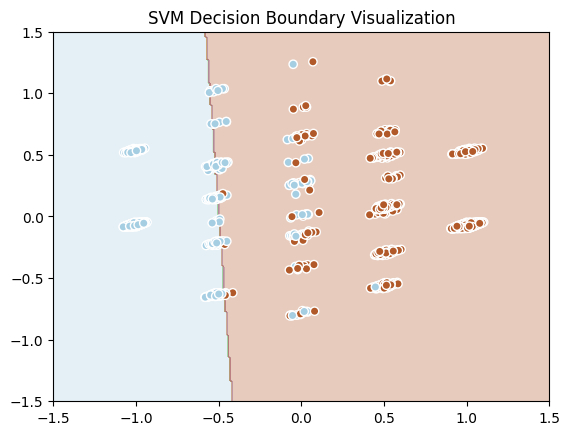

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_train)
x_pca_test = pca.transform(X_test)

arr = np.meshgrid(np.linspace(-1.5, 1.5, 300), np.linspace(-1.5, 1.5, 300))
arr_flat = np.c_[arr[0].ravel(), arr[1].ravel()]
pca_inv = pca.inverse_transform(arr_flat)

y_predict = clf_rbf.predict(pca_inv)

y_predict_mesh = y_predict.reshape(arr[0].shape)

plt.contourf(arr[0], arr[1], y_predict_mesh, cmap=plt.cm.Paired, alpha=0.3)
plt.scatter(x_pca_test[:, 0], x_pca_test[:, 1], c=Y_test, edgecolors='white', cmap=plt.cm.Paired)
plt.title('SVM Decision Boundary Visualization')
plt.show()

## kNN

Аналогічний датасет використовуватиму що і для дерева рішень:

In [30]:
data = pd.read_csv('../waterQuality1.csv')
print(data.head())
print(data.shape)

   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_saf

In [31]:
y_name = 'is_safe'
data[y_name] = pd.to_numeric(data[y_name], errors='coerce')
data = data.dropna(subset=[y_name])
x_data = data.drop(y_name, axis=1)
x_name = x_data.columns
for i in x_name:
    data[i] = pd.to_numeric(data[i], errors='coerce')
    mean_value = data[i].mean()
    std_dev = data[i].std()
    lower_bound = mean_value - 4 * std_dev
    upper_bound = mean_value + 4 * std_dev
    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]
x_data = data.drop(y_name, axis=1)
scaler = StandardScaler()
# scaler = MinMaxScaler()

data_scaled_arr = scaler.fit_transform(x_data)
data_scaled = data.copy()
data_scaled[x_name] = data_scaled_arr
data_scaled[y_name] = data_scaled[y_name].astype(int)

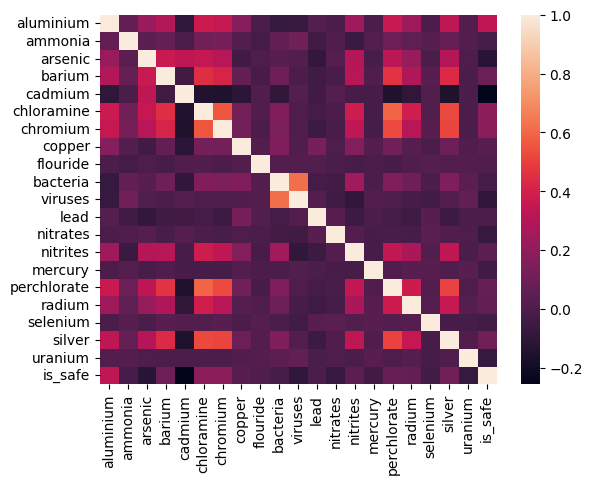

In [32]:
heatmap(data_scaled.corr(numeric_only=True), annot=False)
plt.show()

In [33]:
random_state = 43 # буде в подальшому використовуватись
X_train, X_test, Y_train, Y_test = train_test_split(data_scaled[x_name], data_scaled[y_name], test_size=test_size, random_state=random_state, stratify=data_scaled[y_name])

In [34]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Different values for K
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train, Y_train)


print(f"Best parameters: {grid_search.best_params_}")
Y_pred = grid_search.best_estimator_.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [35]:
Y_pred = grid_search.best_estimator_.predict(X_test)

print("Classification Report:")
print(classification_report(Y_test, Y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2125
           1       0.76      0.36      0.49       274

    accuracy                           0.91      2399
   macro avg       0.84      0.67      0.72      2399
weighted avg       0.90      0.91      0.90      2399

Confusion Matrix:
[[2094   31]
 [ 175   99]]
Accuracy: 0.9141308878699458


## AdaBoost

Аналогічний датасет що і для дерев і кнн

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
param_grid = {
    'n_estimators': [50, 100, 200],        # Кількість базових моделей
    'learning_rate': [0.01, 0.1, 1.0]      # Швидкість навчання
}

# AdaBoost
ada_model = AdaBoostClassifier(random_state=random_state)

grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)
print(f"Найкращі параметри: {grid_search.best_params_}")


best_ada_model = grid_search.best_estimator_
Y_pred = best_ada_model.predict(X_test)

print("Classification Report:")
print(classification_report(Y_test, Y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Найкращі параметри: {'learning_rate': 1.0, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2125
           1       0.76      0.54      0.63       274

    accuracy                           0.93      2399
   macro avg       0.85      0.76      0.80      2399
weighted avg       0.92      0.93      0.92      2399

Confusion Matrix:
[[2078   47]
 [ 125  149]]


In [38]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9283034597749062


шушуть краще ніж knn